# Strain mapping example
This is an example notebook on how to use the software package for the single Bragg edge fitting, for the analysis  of strain and texture variations.
The dataset is composed of multiple laser powder bed fusion cubical samples with increasing strain towards the surfaces along the building direction (horizontal in the images). Some samples are treated by laser shock peening, in different modalities, a process that serves to decrease the strain. 
The data is pre-processed and reduced to a transmission 3D-array with dimension (pixel_x,pixel_y,lambda).

# Importing python modules and functions

In [1]:
#some basic python modules
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import h5py

#if you cloned your directory:
import sys
#update the following line to the downloaded software location
sys.path.append('C:\\Users\\busi_m\\Workspace\\neutronimaging\\ToFImaging\\src\\')

#if you installed via pipinstall you only need this part
import tofimaging.EdgeFitting as efit
import tofimaging.ReductionTools as red

# Loading Data and preparing for the fits
Please download the two files at the following link (will be updated ASAP).

In [2]:
#loading spectrum range in Angstrom
spectrum = np.loadtxt('C:\\Users\\busi_m\\Workspace\\Projects\\ESS_Software\\strain_demo\\lambda.txt') 
#loading the preprocessed data from a matlab 7.3v 
T = h5py.File('C:\\Users\\busi_m\\Workspace\\Projects\\ESS_Software\\strain_demo\\data_E.mat','r')['T']
T = np.asarray(T)
T = T.transpose((2,1,0))

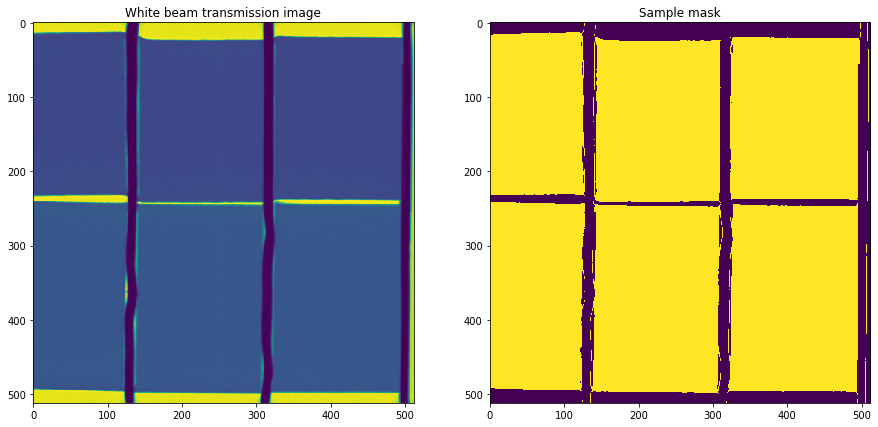

In [3]:
#plotting white beam transmission image and preparing fitting mask (simple low/high thresholds)
plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
plt.imshow(np.nanmean(T,axis=2))
plt.title('White beam transmission image')

mask = np.nanmean(T,axis=2)
mask[mask<0.2]=0
mask[mask>0.35]=0
mask[mask>0]=1

plt.subplot(1,2,2)
plt.imshow(mask)
plt.title('Sample mask'),
plt.show()
plt.close()

Data is 3D but filtering kernel is 2D. Applying filter to each slice of the data (third dimension).


100%|███████████████████████████████████████| 661/661 [00:06<00:00, 105.07it/s]


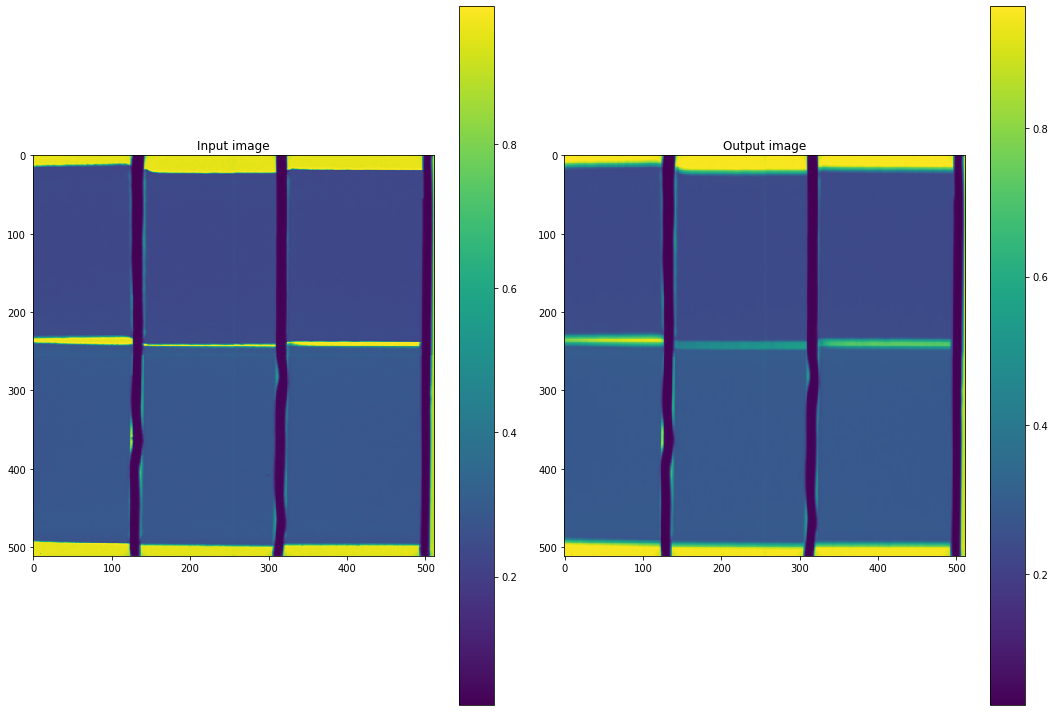

In [4]:
# moving average with custom kernel to increase neutron statistics
T_filt = red.DataFiltering(T,BoxKernel=[10,1],bool_print=1)

# Data fitting
Data is now ready for fitting. We fit both using Gaussian method and Advanced method. In both case we test first on a single pixel by setting the debug_idx parameter, and we use the fit results as initial guess for the full image fitting to increase performance (both speed and quality).

## Gaussian fitting

C:\Users\busi_m\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 4431 results
  r = func(a, **kwargs)


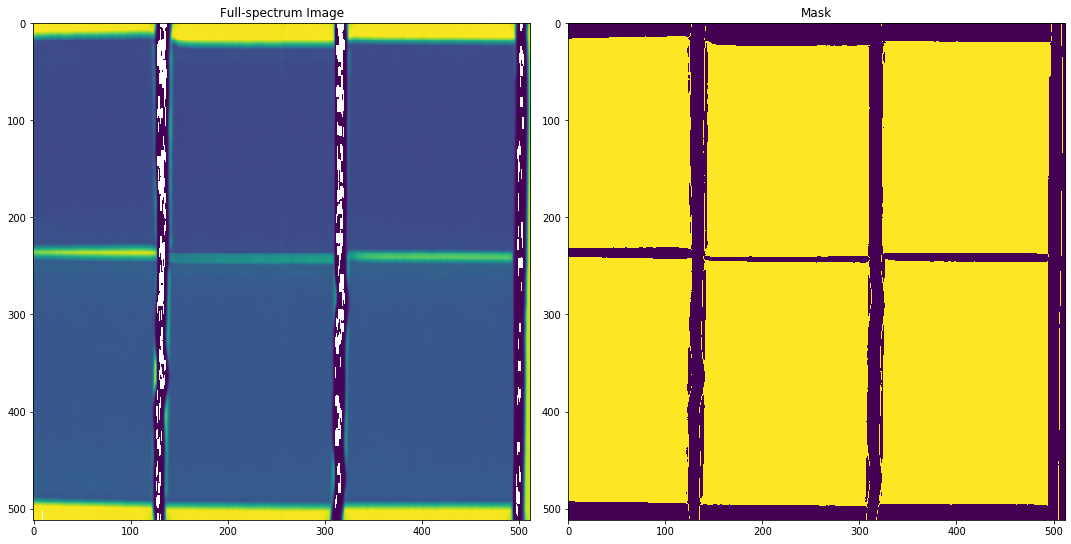

pos fit =  4.142257841194775
h fit =  0.11507260593631466
wid fit =  0.019520126102326084
off fit =  -0.001200365258149051
idx_low =  475 idx_high =  484


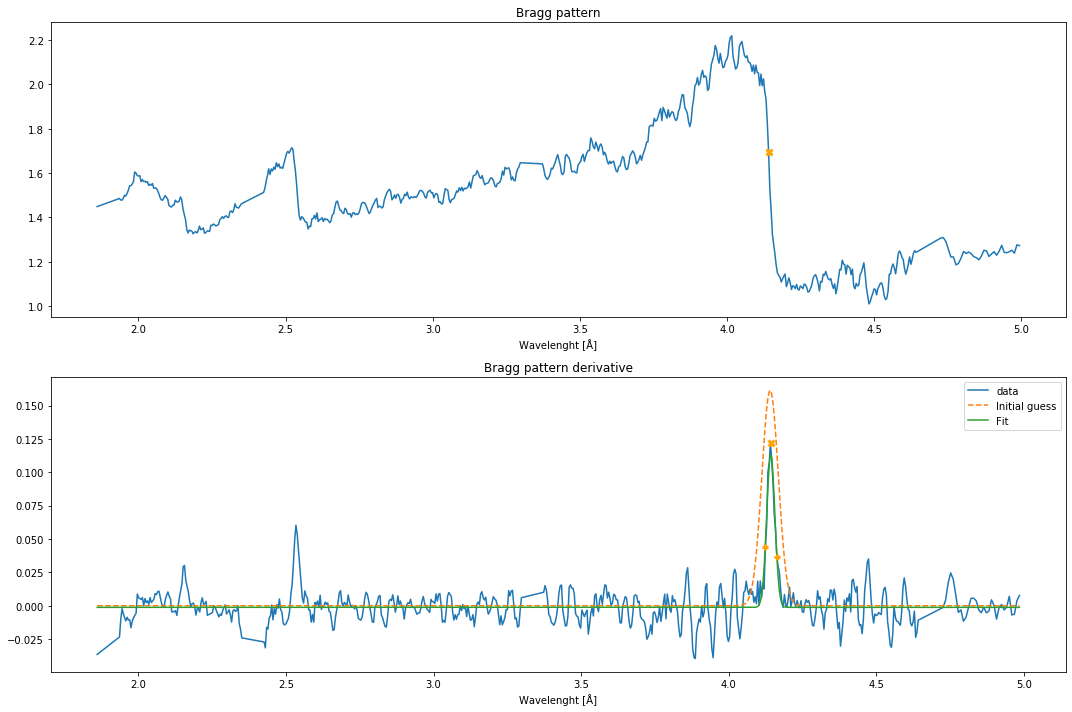

In [5]:
# here we test on a single pixel
lrange = [1.0, 5.0]
edge_pos = 4.14
pixel = [150,200]
fit = efit.GaussianBraggEdgeFitting2D(T_filt, spectrum, lrange, mask = mask,
                                                 bool_log = True,
                                                 est_pos = 4.14,
                                                 bool_smooth = True, smooth_w = 5, smooth_n = 1, 
                                                 debug_idx = pixel)

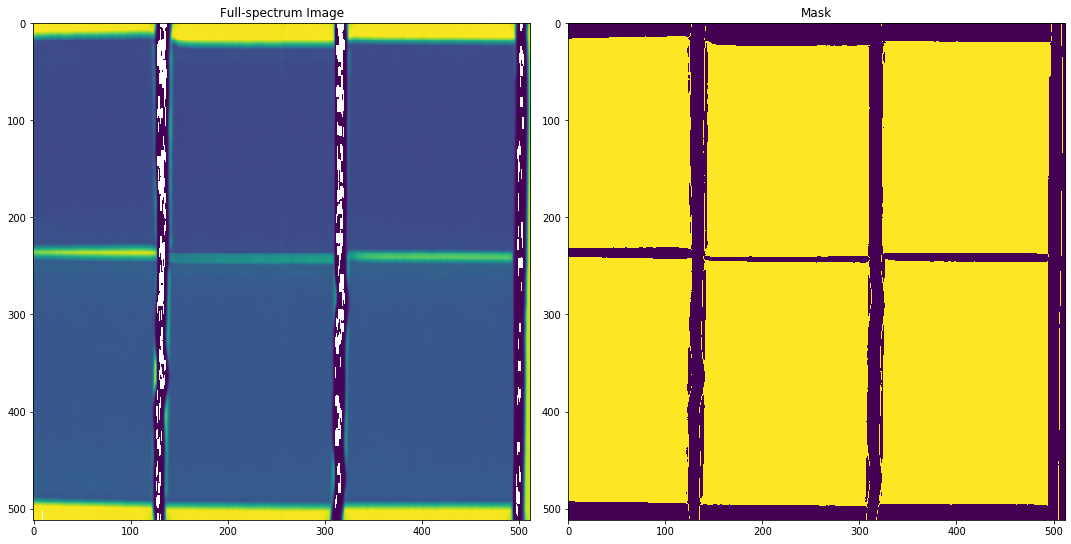

  0%|▏                                         | 2/512 [00:00<00:31, 16.43it/s]C:\Users\busi_m\AppData\Local\Continuum\anaconda3\lib\site-packages\lmfit\minimizer.py:779: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
C:\Users\busi_m\AppData\Local\Continuum\anaconda3\lib\site-packages\lmfit\minimizer.py:786: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
  4%|█▊                                       | 23/512 [00:13<16:14,  1.99s/it]

In [ ]:
lrange = [3.5, 4.5]
edge_pos = 4.14
est_h = 0.1
est_wid = 0.01
pos_BC=[4.1,4.2]
wid_BC=[0.0,0.02]
fit_G = efit.GaussianBraggEdgeFitting2D(T_filt, spectrum, lrange, mask = mask,
                                          bool_log = True,
                                          est_pos = edge_pos, est_wid = est_wid, est_h = est_h,
                                          pos_BC = pos_BC, wid_BC = wid_BC,
                                          bool_smooth = True, smooth_w = 5, smooth_n = 1,
                                          bool_print = 1)

## Advanced Fitting (7 iteration)

In [ ]:
lrange = [3.0, 4.5]
edge_pos = 4.14
pixel = [150,200]
fit = efit.AdvancedBraggEdgeFitting2D(T_filt, spectrum, lrange, mask = mask,
                                                 est_pos = edge_pos,
                                                 bool_smooth = True, smooth_w = 5, smooth_n = 1, 
                                                 debug_idx = pixel)

In [ ]:
lrange = [3.7, 4.5]
edge_pos = 4.14
est_alpha = 0.001
est_sigma = 0.01
fit_Ai = efit.AdvancedBraggEdgeFitting2D(T_mavg, spectrum, lrange, mask = mask,
                                          est_pos = edge_pos, est_alpha = est_alpha, est_sigma = est_sigma, 
                                          bool_smooth = True, smooth_w = 5, smooth_n = 1, 
                                          bool_print = 1)

## Advanced Fitting (direct)

In [ ]:
lrange = [3.0, 4.5]
edge_pos = 4.14
pixel = [150,200]
fit = efit.AdvancedDirectBraggEdgeFitting2D(T_filt, spectrum, lrange, mask = mask,
                                                 est_pos = edge_pos,
                                                 bool_smooth = True, smooth_w = 5, smooth_n = 1, 
                                                 debug_idx = pixel)

In [ ]:
lrange = [3.7, 4.5]
edge_pos = 4.14
est_alpha = 0.001
est_sigma = 0.01
fit_Ad = efit.AdvancedDirectBraggEdgeFitting2D(T_mavg, spectrum, lrange, mask = mask,
                                          est_pos = edge_pos, est_alpha = est_alpha, est_sigma = est_sigma, 
                                          bool_smooth = True, smooth_w = 5, smooth_n = 1, 
                                          bool_print = 1)


## Printing maps and comparing results
### Edge position

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1), plt.imshow(fit_Ai['edge_position'])
plt.title('Advanced Fitting (7iteration)')
plt.subplot(1,3,2), plt.imshow(fit_Ad['edge_position'])
plt.title('Advanced Fitting (Direct)')
plt.subplot(1,3,3), plt.imshow(fit_G['edge_position'])
plt.title('Gaussian Fitting')
plt.show()
plt.close()

### Edge height
For the advanced edge fitting it is calculated as difference before and after.

For the gaussian fitting it is calculated as the amplitude of the derivative gaussian fitting hence, it is actually the slope.

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1), plt.imshow(fit_Ai['edge_height'])
plt.title('Advanced Fitting (7iteration)')
plt.subplot(1,3,2), plt.imshow(fit_Ad['edge_height'])
plt.title('Advanced Fitting (Direct)')
plt.subplot(1,3,3), plt.imshow(fit_G['edge_height'])
plt.title('Gaussian Fitting')
plt.show()
plt.close()

### Edge width

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1), plt.imshow(fit_Ai['edge_width'])
plt.title('Advanced Fitting (7iteration)')
plt.subplot(1,3,2), plt.imshow(fit_Ad['edge_width'])
plt.title('Advanced Fitting (Direct)')
plt.subplot(1,3,3), plt.imshow(fit_G['edge_width'])
plt.title('Gaussian Fitting')
plt.show()
plt.close()